# Heart Failure Prediction Dataset

## 組員名單
李沛綺 d10429002 <br/>
鄧喬尹 b07602001 <br/>
呂祐寬 b10401019 <br/>
羅偉嘉 f04424006 <br/>

In [1]:
import numpy as np
import pandas as pd

## Data preprocessing

In [2]:
df = pd.read_csv('heart.csv')

### 確認各欄位之資料類型

In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### 將類別的資料轉換為Dummy variable

In [4]:
df_dummy = pd.get_dummies(df)

### 準備 Feature(X) 及 Label(y)

In [5]:
y = df_dummy.pop('HeartDisease').values

In [6]:
X = df_dummy.to_numpy()

### 準備訓練資料集(Training dataset)、驗證資料集(Validating dataset)及測試資料集(Testing dataset)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=1, 
                                                    stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, 
                                                      y_train, 
                                                      test_size=0.1, 
                                                      random_state=1, 
                                                      stratify=y_train)

### Normalizing dataset

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_valid_std = sc.transform(X_valid)
X_test_std = sc.transform(X_test)

## Training model

### Perceptron

In [9]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
print('Accuracy: %.3f' % ppn.score(X_train_std, y_train))
print('Accuracy: %.3f' % ppn.score(X_valid_std, y_valid))

Accuracy: 0.829
Accuracy: 0.819


In [10]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.804


### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr', penalty = 'l2')
lr.fit(X_train_std, y_train)
print('Accuracy: %.3f' % lr.score(X_train_std, y_train))
print('Accuracy: %.3f' % lr.score(X_valid_std, y_valid))

Accuracy: 0.872
Accuracy: 0.867


In [12]:
print('Accuracy: %.3f' % lr.score(X_test_std, y_test))

Accuracy: 0.859


### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=2)
tree_model.fit(X_train, y_train)
print('Accuracy: %.3f' % tree_model.score(X_train, y_train))
print('Accuracy: %.3f' % tree_model.score(X_valid_std, y_valid))

Accuracy: 0.886
Accuracy: 0.398


In [14]:
print('Accuracy: %.3f' % tree_model.score(X_test, y_test))

Accuracy: 0.859


### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=2)
# forest = RandomForestClassifier(n_estimators=1000)
forest.fit(X_train, y_train)
print('Accuracy: %.3f' % forest.score(X_train, y_train))
print('Accuracy: %.3f' % forest.score(X_valid_std, y_valid))

Accuracy: 1.000
Accuracy: 0.855


In [16]:
print('Accuracy: %.3f' % forest.score(X_test, y_test))

Accuracy: 0.859


### 繪製 Random Forest 的圖

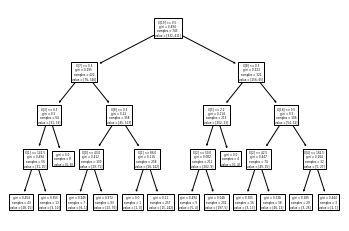

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(tree_model)  
plt.savefig('03_21_1.pdf')
plt.show()

In [18]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

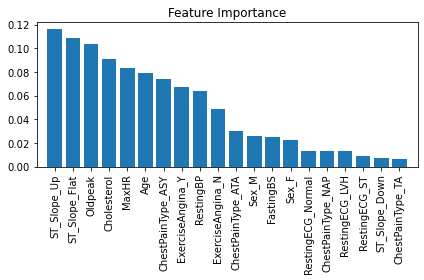

In [19]:
importances = forest.feature_importances_
feat_labels = df_dummy.columns
indices = np.argsort(importances)[::-1] # Reverse an array by [::-1]

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')

plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

### SVC

In [20]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=1)
svm.fit(X_train_std, y_train)
print('Accuracy: %.3f' % svm.score(X_train_std, y_train))
print('Accuracy: %.3f' % svm.score(X_valid_std, y_valid))

Accuracy: 0.872
Accuracy: 0.880


In [21]:
print('Accuracy: %.3f' % svm.score(X_test_std, y_test))

Accuracy: 0.870


In [22]:
svm2 = SVC(kernel='rbf', random_state=1)
svm2.fit(X_train_std, y_train)
print('Accuracy: %.3f' % svm2.score(X_train_std, y_train))
print('Accuracy: %.3f' % svm2.score(X_valid_std, y_valid))

Accuracy: 0.907
Accuracy: 0.855


In [23]:
print('Accuracy: %.3f' % svm2.score(X_test_std, y_test))

Accuracy: 0.859
